# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.patches import Rectangle

# Importing data and overview 

# Annotator responses data

In [2]:
# read the annotators data. In the pd.read_json method, please insert the annonymized_project file name.
annotator_data = pd.read_json('anonymized_project.json')

In [3]:
# get all the results
annotators_results = annotator_data['results']['root_node']['results']

In [4]:
# iterate through each key of results that has be changed to a list
keys = []
for key in [annotators_results][0]:
    keys.append(key)

1a. Number of annotators

In [5]:
# append all the annotators into a list
list_of_annotators = []
for i in range(0, len(annotators_results)):
    for j in np.arange(0, len(annotators_results[keys[i]]['results'])):
        list_of_annotators.append(annotators_results[keys[i]]['results'][j]['user']['vendor_user_id'])
        

In [6]:
# obtain the list of annotators. set method is used because some annotators appear more than once
number_of_annotators = len(set(list_of_annotators))
number_of_annotators

22

Answer: 22 annotators contributed to the dataset

1b. Average, Minimum and Maximum annotation times

In [19]:
task_output_data = []
for i in range(0, len(annotators_results)):
    for j in np.arange(0, len(annotators_results[keys[i]]['results'])):
        task_output_data.append(annotators_results[keys[i]]['results'][j]['task_output'])
        

In [20]:
annotation_times = []
for i in range(0, len(task_output_data)):
    annotation_times.append(task_output_data[i]['duration_ms'])

In [21]:
max_annotation_time = np.max(annotation_times)
max_annotation_time

42398

The maximum annotation time was 42398 ms

In [22]:
min_annotation_time = np.min(annotation_times)
min_annotation_time

-99999

The minimum annotation time was -99999 ms

In [23]:
average_annotation_time = np.mean(annotation_times)
average_annotation_time

1284.3338725652031

The average annotation time was 1284.3338725652031 ms

In [24]:
# an overview of the distribution of the annotation times
annotation_times_overview = pd.DataFrame(annotation_times).describe()
annotation_times_overview

,0
count,90870.000000
mean,1284.333873
std,1351.960465
min,-99999.000000
25%,887.000000
50%,1058.000000
75%,1328.000000
max,42398.000000


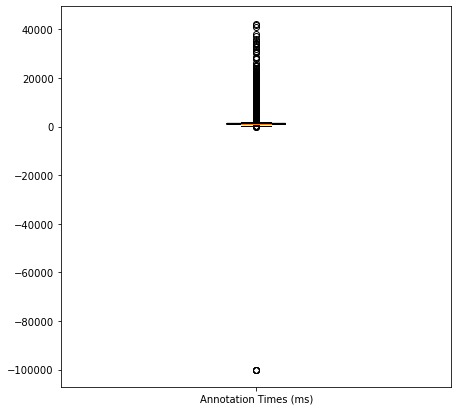

In [27]:
# Box plot to show overall statistical information on the data

plt.figure(figsize = (7, 7))
plt.boxplot(annotation_times, patch_artist=True, notch=True)
plt.xticks([1], ['Annotation Times (ms)'])
plt.show()

Observation: It can be observed that the minimum annotation time is actually an outlier

1c. Did all annotators produce same amount of results or not?

In [43]:
# dataframe creation from list_of_annotators 
annotators_df = pd.DataFrame(list_of_annotators, columns=['Annotators'])

# result dataframe from task_output_data
result_df = pd.DataFrame(task_output_data)

# concatenation of annotators_df and result_df
annotators_results_df = pd.concat([annotators_df, result_df], axis = 1)

<AxesSubplot:xlabel='Annotators', ylabel='count'>

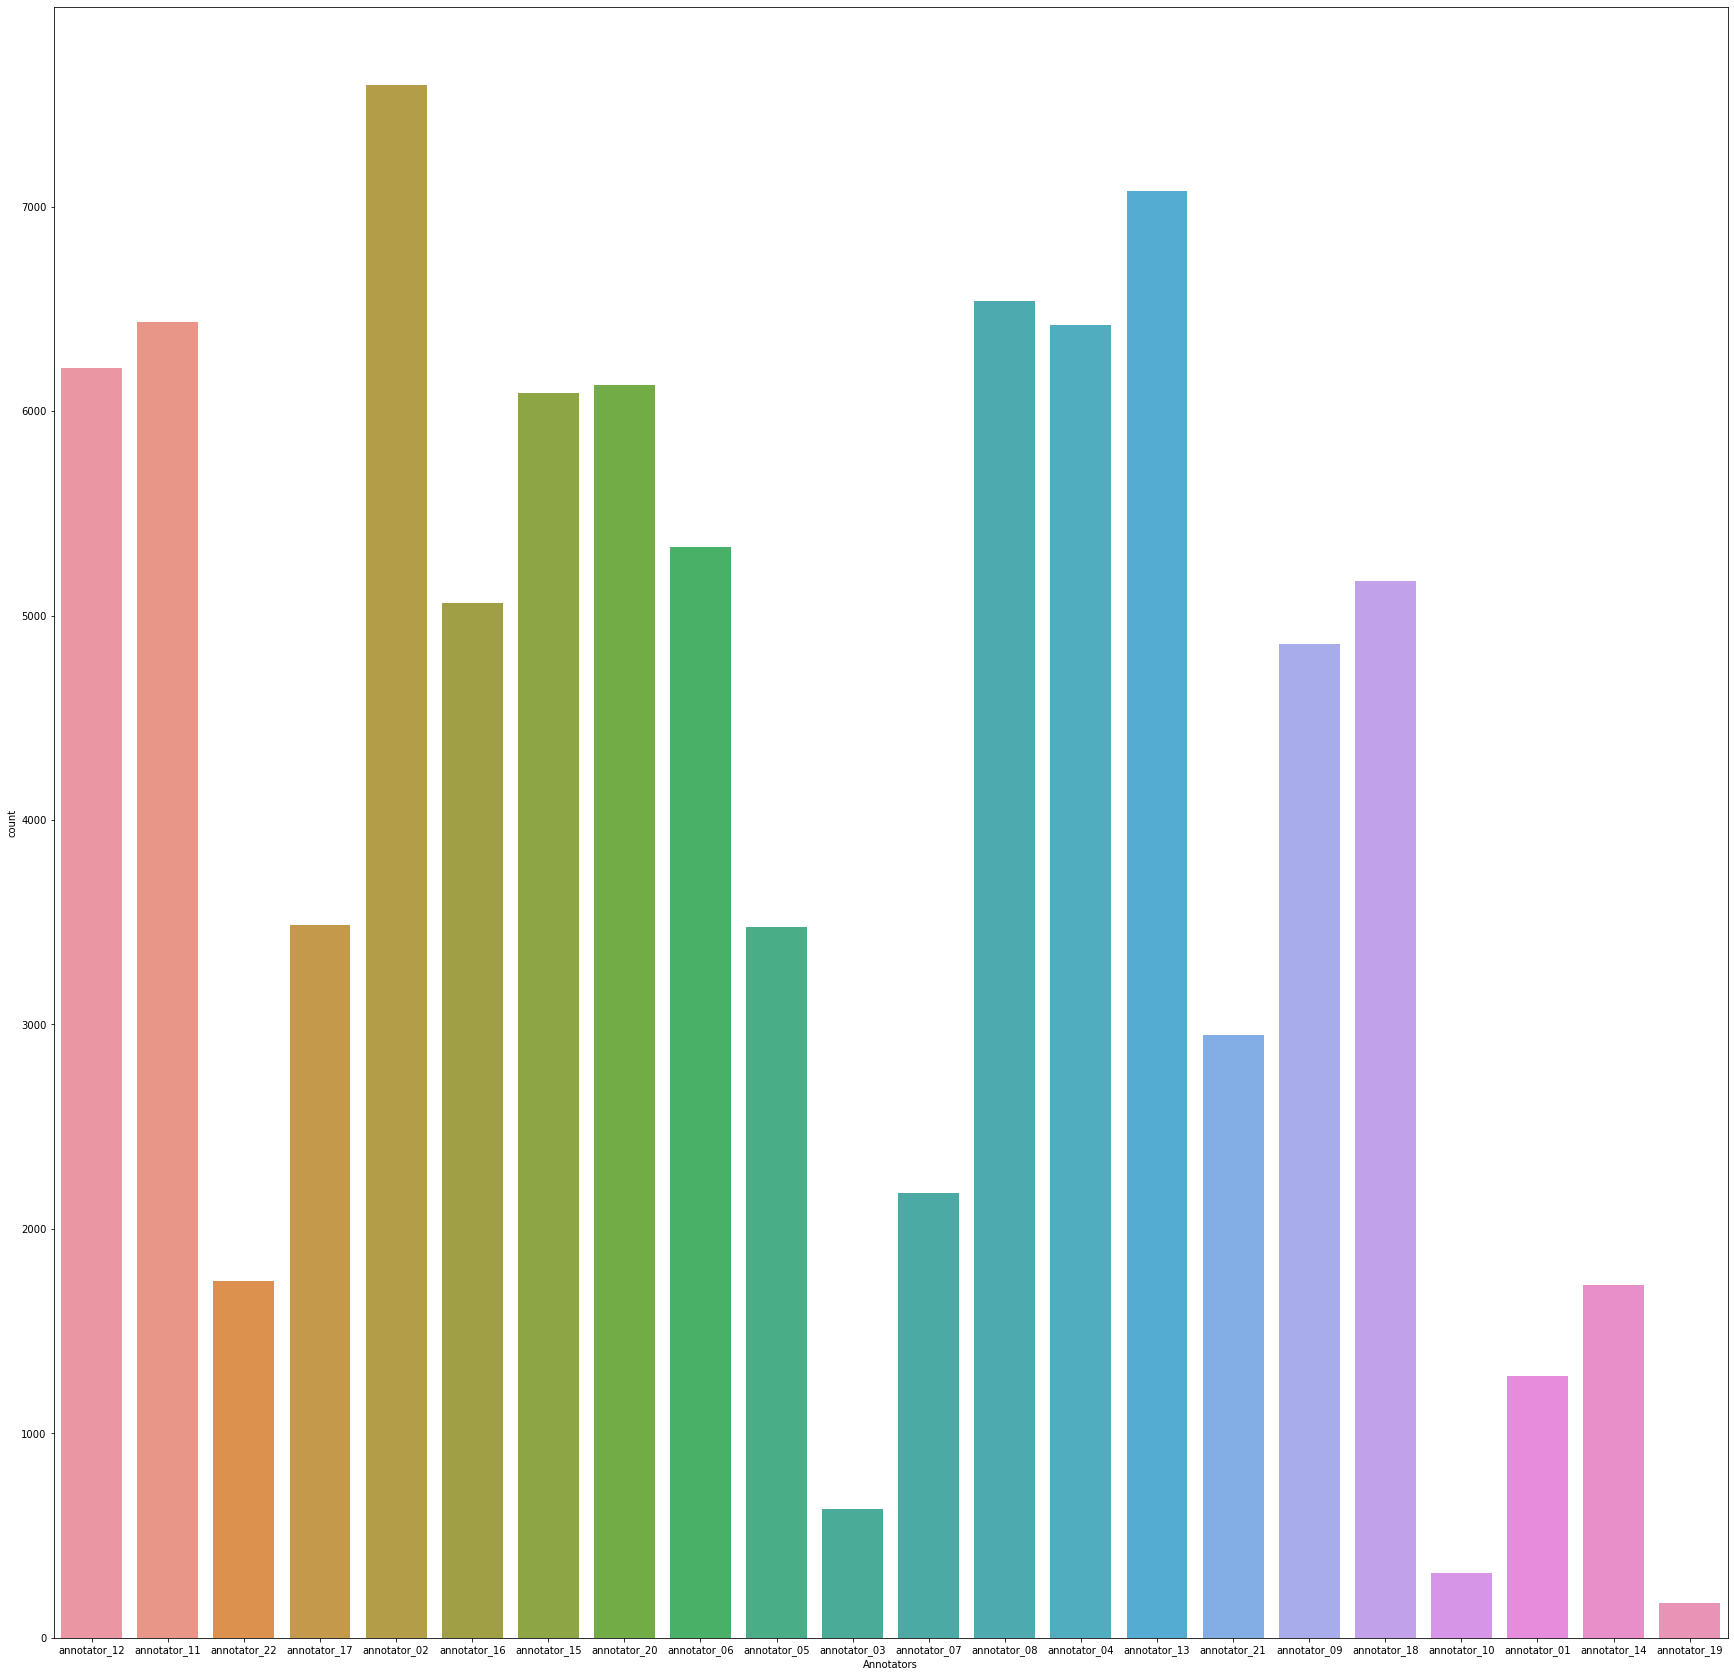

In [42]:
plt.figure(figsize=(30, 30))
sns.countplot(x='Annotators', data=annotators_results_df)

Answer: From the countplot, it can observed that not all annotators produced the same amount of results. They all produced different amount of results

1d. Questions for which annotators disagree

In [44]:
task_input_data = []
for i in range(0, len(annotators_results)):
    for j in np.arange(0, len(annotators_results[keys[i]]['results'])):
        task_input_data.append(annotators_results[keys[i]]['results'][j]['task_input'])

In [45]:
# obtain the image urls
image_urls = []
for i in range(0, len(task_input_data)):
    image_urls.append(task_input_data[i]['image_url'])

In [46]:
# image list
images = []
for url in image_urls:
    searchObj = re.search( r'img_(.+?).jpg', url, re.M|re.I)
    images.append(searchObj.group())
images_df = pd.DataFrame(images, columns=['Images'])

In [47]:
# answers list
answers = []
get_property(task_output_data, answers, 'answer' )
answers_df = pd.DataFrame(answers, columns=['Answers'])

In [48]:
df = pd.concat([annotators_df, images_df, answers_df], axis=1)

In [49]:
# a dictionary for each image and the answers
images_answers_dict = {}
for i in np.arange(0, len(images), 10):
    images_answers_dict[images[i]] = answers[i:10+i]
  

In [50]:
count_yes = 0 # number of yes answers
count_no = 0  # number of no answers
images_annotators_disagree = []
for key in images_answers_dict:
    for i in images_answers_dict[key]:
        if i == 'no':
            count_no = count_no + 1
        if i == 'yes':
            count_yes = count_yes + 1
    # it is assumed that when the difference between yes and no of two annotators is less than or equal to 3, they disagree
    if count_no - count_yes <=3 | count_yes - count_no <=3:
        images_annotators_disagree.append(key)



In [51]:
images_annotators_disagree

['img_8607.jpg',
 'img_0341.jpg',
 'img_7230.jpg',
 'img_5467.jpg',
 'img_7192.jpg',
 'img_0719.jpg',
 'img_2731.jpg']

The images in the list above are the ones in which the annotators highly disagree because the difference between yes and no is not so much i.e less than or equals to 3

2

In [52]:
cant_solve = []
get_property(task_output_data, cant_solve, 'cant_solve')
cant_solve_df = pd.DataFrame(cant_solve, columns=['Cant Solve'])

In [53]:
corrupt_data = []
get_property(task_output_data, corrupt_data, 'corrupt_data')
corrupt_data_df = pd.DataFrame(corrupt_data, columns=['Corrupt Data'])

In [54]:
# dataframe of annotators, cant_solve and corrupt_data
new_df = pd.concat([annotators_df,images_df, cant_solve_df, corrupt_data_df], axis = 1)

In [64]:
# dataframe that shows where cant_solve or corrupt_data are used
no_data_df = new_df[(new_df['Cant Solve'] == True) | (new_df['Corrupt Data'] == True)]

In [65]:
cant_solve = no_data_df[no_data_df['Cant Solve'] == True]

<AxesSubplot:xlabel='Cant Solve', ylabel='count'>

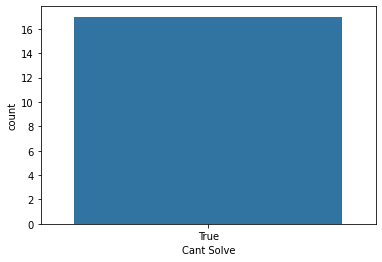

In [66]:
sns.countplot(x='Cant Solve', data=cant_solve)

In [67]:
number_of_cant_solve = no_data_df[no_data_df['Cant Solve'] == True].groupby('Cant Solve').count()['Annotators']
number_of_cant_solve

Cant Solve
True    17
Name: Annotators, dtype: int64

In [68]:
corrupt_data = no_data_df[no_data_df['Corrupt Data'] == True]

<AxesSubplot:xlabel='Corrupt Data', ylabel='count'>

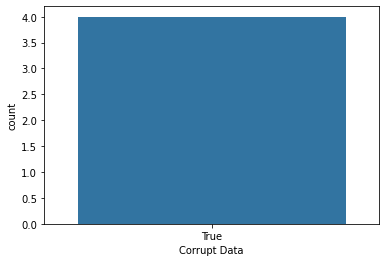

In [69]:
sns.countplot(x='Corrupt Data', data=corrupt_data)

In [70]:
number_of_corrupt_data = no_data_df[no_data_df['Corrupt Data'] == True].groupby('Corrupt Data').count()['Annotators']
number_of_corrupt_data

Corrupt Data
True    4
Name: Annotators, dtype: int64

cant_solve was used 17 times while corrupt_data was used 4 times

# Reference Data

In [31]:
# read the reference data. In the pd.read_json method, please insert the reference file name.
reference_data = pd.read_json('references.json')

In [32]:
reference_data

,img_4686,img_8607,img_5541,img_3218,img_3247,img_1876,img_6228,img_4653,img_5488,img_8591,...,img_3563,img_7393,img_7061,img_6877,img_2192,img_5282,img_0628,img_7736,img_1042,img_2866
is_bicycle,False,True,False,False,True,True,True,False,True,False,...,True,False,False,True,True,True,True,True,False,True


In [33]:
reference_answers = []
for key in reference_data:
    reference_answers.append(reference_data[key]['is_bicycle'])

In [34]:
number_of_false = 0
number_of_true = 0
for i in reference_answers:
    if i == False:
        number_of_false = number_of_false + 1
    elif i == True:
        number_of_true = number_of_true + 1

In [35]:
number_of_false

4501

In [36]:
number_of_true

4586

Yes the reference set is balanced as seen from the number_of_false and number_of_true values

In [37]:
for i in range(0, len(reference_answers)):
    if reference_answers[i] == True:
        reference_answers[i] = 1
    elif reference_answers[i] == False:
        reference_answers[i] = 0

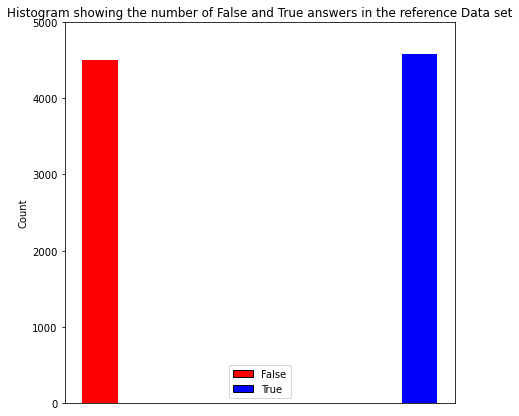

In [38]:
plt.figure(figsize = (7, 7))
false_color = 'red'
true_color = 'blue'
index, bins, patches = plt.hist(reference_answers, color = true_color)
patches[0].set_fc(false_color)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [false_color,true_color]]
labels= ["False","True"]
plt.legend(handles, labels)
plt.yticks(np.arange(0, 6000, 1000))
plt.ylabel('Count')
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
plt.title('Histogram showing the number of False and True answers in the reference Data set')
plt.show()

In [39]:
reference_data_answers = reference_data.transpose()['is_bicycle'].to_dict()

In [40]:
annotators = list(set(list_of_annotators))

In [41]:
annotators.sort()

In [42]:
list_of_dataframes = get_list_of_dataframes(annotators, df, reference_data_answers)

/Users/obinnaisiwekpeni/Desktop/Bicycle-Project-Crowd-Evaluation/codes/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Reference'] = new_col


In [43]:
list_of_dataframes[0]

,Annotators,Images,Answers,Reference
120,annotator_01,img_0021.jpg,yes,True
134,annotator_01,img_8259.jpg,yes,True
159,annotator_01,img_4521.jpg,yes,True
267,annotator_01,img_3227.jpg,yes,True
285,annotator_01,img_0286.jpg,no,True
...,...,...,...,...
90563,annotator_01,img_7558.jpg,no,False
90627,annotator_01,img_5082.jpg,yes,True
90659,annotator_01,img_6568.jpg,no,False
90692,annotator_01,img_8477.jpg,yes,True


In [44]:
anno_percent_dict = {}   # this is a dictionary of the annotators and the percentage of correct answers they made
for dataframe in list_of_dataframes:
    number_of_row_data = len(dataframe)
    num_of_correct_answers = len(dataframe[(dataframe['Answers'] == 'yes') & (dataframe['Reference'] == True)])+ len(dataframe[(dataframe['Answers'] == 'no') & (dataframe['Reference'] == False)])
    percentage_of_correct_answers = (num_of_correct_answers / number_of_row_data) * 100
    anno_percent_dict[dataframe['Annotators'].iloc[0]] = percentage_of_correct_answers
    

In [45]:
anno_percent_dict

{'annotator_01': 94.84375,
 'annotator_02': 93.48341232227489,
 'annotator_03': 92.85714285714286,
 'annotator_04': 92.82043295436848,
 'annotator_05': 93.6978417266187,
 'annotator_06': 92.6550496533633,
 'annotator_07': 91.49425287356323,
 'annotator_08': 89.9189230533884,
 'annotator_09': 93.33333333333333,
 'annotator_10': 88.88888888888889,
 'annotator_11': 93.62958359229336,
 'annotator_12': 92.97906602254429,
 'annotator_13': 94.68776490534049,
 'annotator_14': 94.66666666666667,
 'annotator_15': 94.84231274638634,
 'annotator_16': 94.23038925113613,
 'annotator_17': 94.20373027259684,
 'annotator_18': 93.63636363636364,
 'annotator_19': 94.70588235294117,
 'annotator_20': 94.82533463924257,
 'annotator_21': 94.0,
 'annotator_22': 94.21203438395416}

From the dictionary above, it can be observed that all the  annotators had good results with the least having a percentage of accuracy of 88.888 percent. Hence, all the annotators are good annotators

In [63]:
df3 = pd.DataFrame(anno_percent_dict, index=['Percentage']).transpose()

In [67]:
df3.reset_index(inplace=True)

In [68]:
df3

,index,Percentage
0,annotator_01,94.843750
1,annotator_02,93.483412
2,annotator_03,92.857143
3,annotator_04,92.820433
4,annotator_05,93.697842
5,annotator_06,92.655050
6,annotator_07,91.494253
7,annotator_08,89.918923
8,annotator_09,93.333333
9,annotator_10,88.888889


<AxesSubplot:xlabel='index', ylabel='Percentage'>

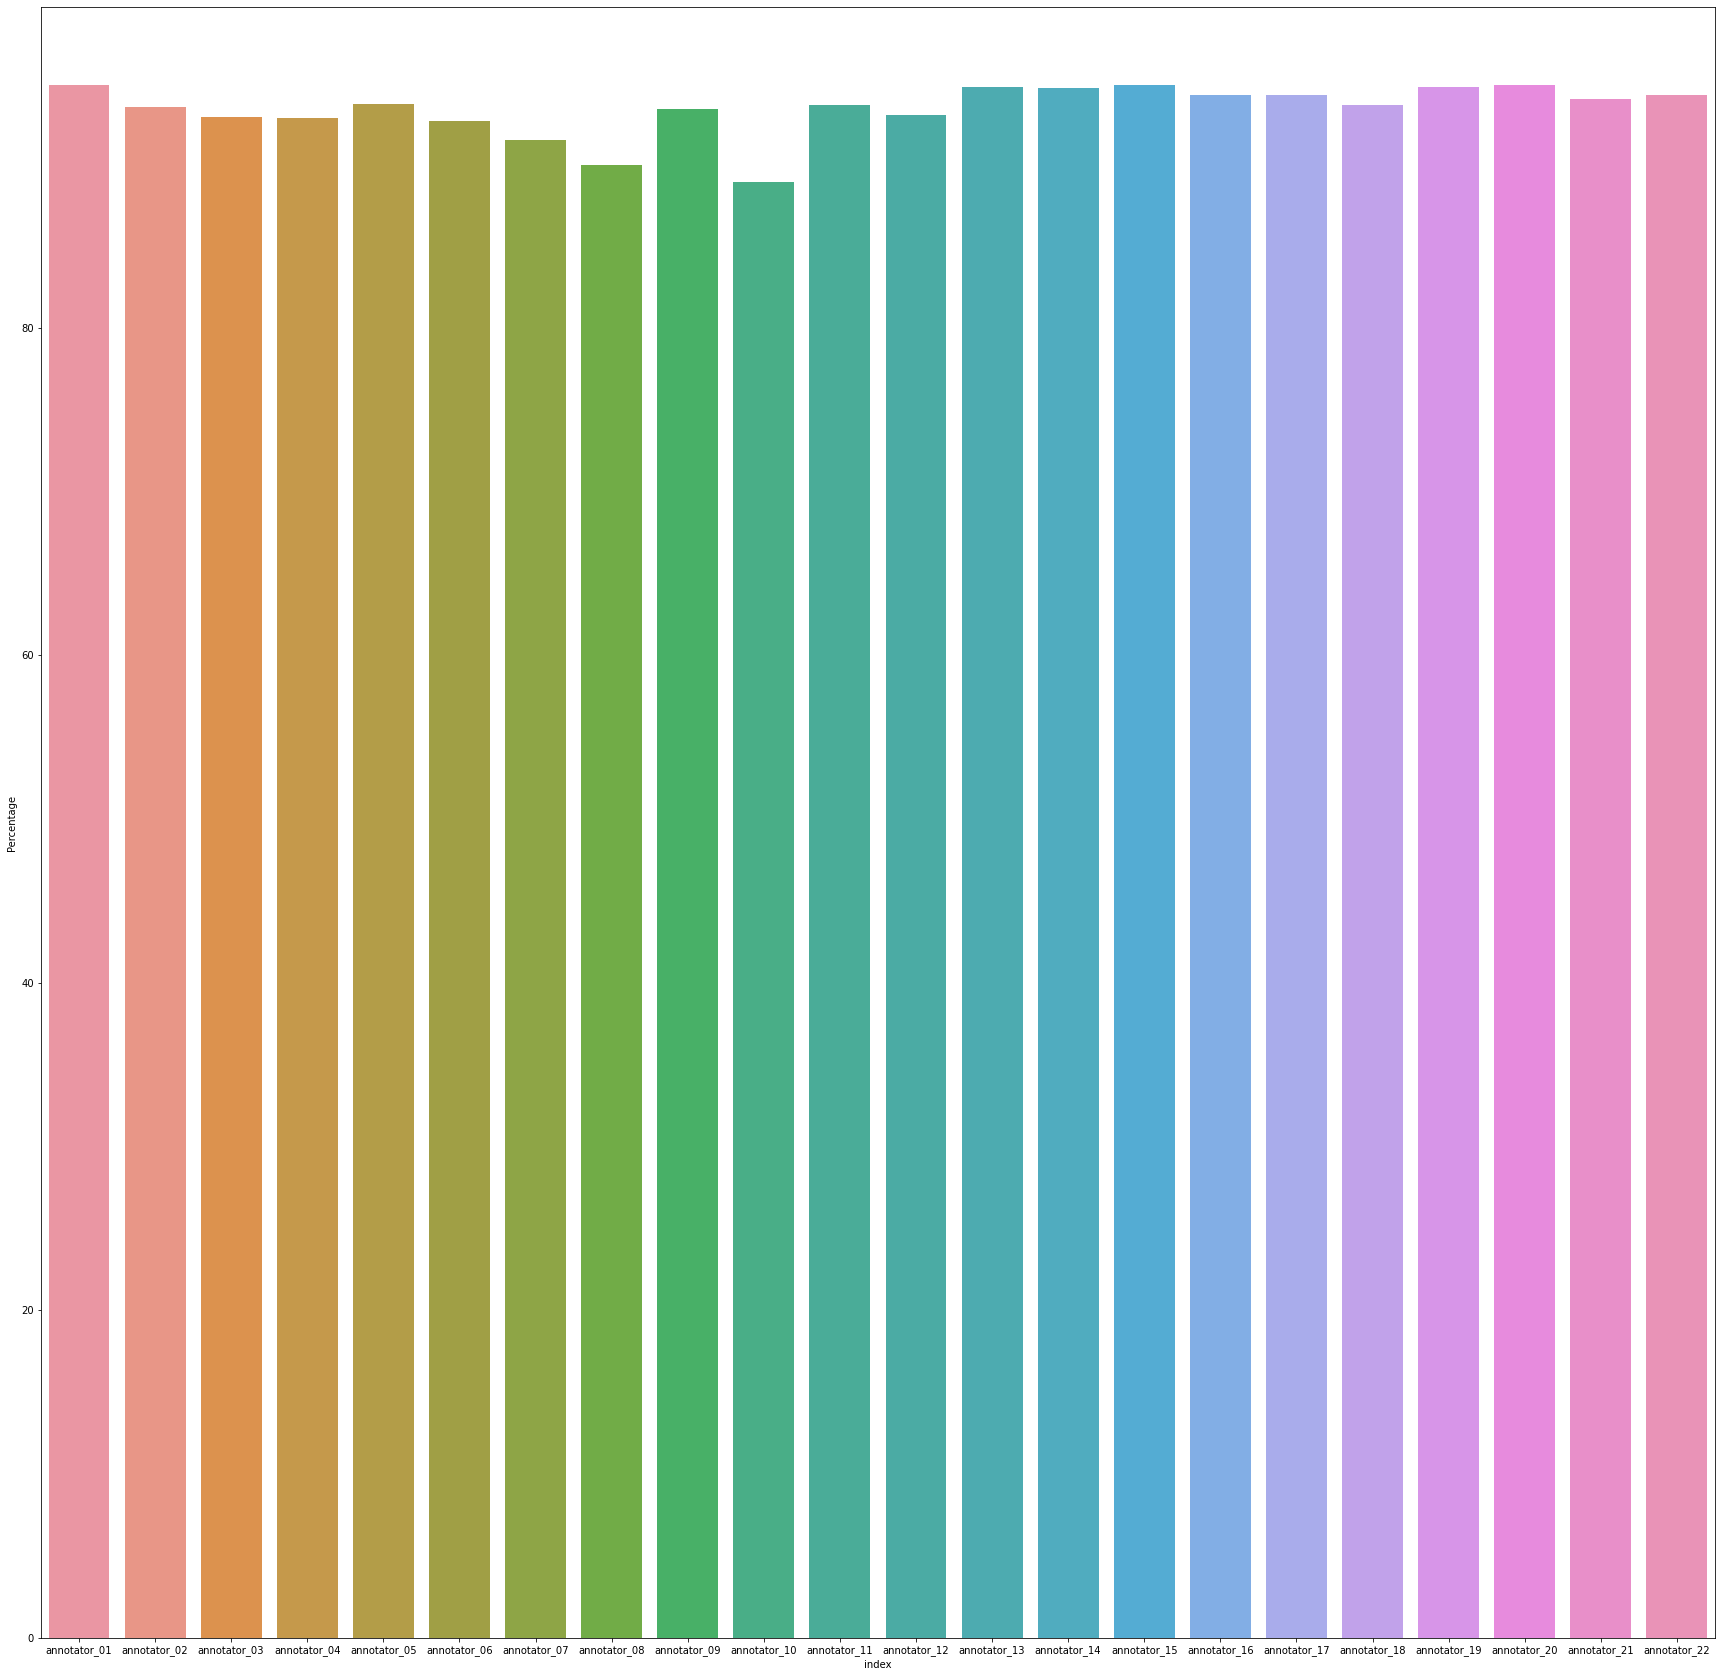

In [78]:
plt.figure(figsize=(30, 30))
sns.barplot(x='index', y='Percentage', data=df3)

The bar plot above is a plot of the annotators and the percentage of correct answers. It can be visualized that all annotators are good annotators